## Άσκηση 2

...


In [1]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
s = os.getcwd()
print(s)

C:\Users\Peter\Desktop\assignments\ROH D\Digital Communications\labs


In [3]:
import warnings
warnings.filterwarnings('ignore')

### _Μέρος2: Σχεδιασμός και υλοποίηση φίλτρων_

Θα ασχοληθούμε με το Παράδειγμα 1.2 της παραγράφου 1.5 του τεύχους Μαθήματος. Το παράδειγμα αυτό παρουσιάζει δύο εναλλακτικές μεθόδους σχεδιασμού FIR φίλτρων:
α) τη μέθοδο των παραθύρων και
β) τη μέθοδο των ισοϋψών κυματώσεων
τις οποίες εφαρμόζει στην περίπτωση βαθυπερατών φίλτρων. 

Στο παράδειγμα, τα φίλτρα δοκιμάζονται σε ένα πραγματικό σήμα, s, το οποίο είναι αποθηκευμένο  στο αρχείο sima.mat (binary αρχείο MATLAB). Πρόκειται για ένα σήμα sonar με φάσμα που εκτείνεται μέχρι περίπου τα 4 KHz και συχνότητα δειγματοληψίας Fs=8192 (είναι και αυτή αποθηκευμένη στο αρχείο sima.mat, μαζί με το σήμα).

Εδώ θα πειραματιστούμε με δύο σήματα: (i) το sonar του παραδείγματος, το οποίο εδώ διαβάζεται από ένα .txt αρχείο (έχει προέλθει με εξαγωγή του s από το MATLAB) και (ii) ένα σήμα μουσικής, το violin.wav (σήμα από μουσική βιολιού), το οποίο περιέχει υψηλότερες συχνότητες και έχει προέλθει με δειγματοληψία στα Fs_viol=44100 Hz.


### Σήμα sonar

In [4]:
# Ανάγνωση δειγμάτων σήματος από txt file
with open('LAB2_files/sima.txt') as f:
    s = [float(x) for x in f]
s=np.array(s)   
print('τομέγεθος του σήματος είναι ', s.shape[0],' δείγματα')
Fs=8192

τομέγεθος του σήματος είναι  6565  δείγματα


#### Στο πεδίο του χρόνου
Παρακάτω βλέπουμε το σήμα sonar το οποίο φορτώσαμε από τον φάκελο 'LAB2_files' στο πεδίο του χρόνου

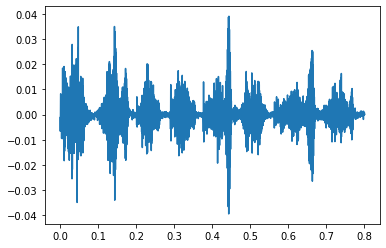

In [5]:
t=np.arange(0,len(s))/Fs
plt.plot(t,s)
plt.show()

#### Ακούμε το σήμα 

In [6]:
# Πρέπει να έχουμε εγκατεστημένη τη βιβλιοθήκη sounddevice στο enviroment που χρησιμοποιούμε για την συγκεκριμένη άσκηση 
#(βλ. οδηγό εγκατάστασης για περισσότερες πληροφορίες)


#import sounddevice as sd
# sd.play(20*s,Fs)

### Φάσμα (spectrum) 
Στη συνέχεια βλέπουμε το περιοδόγραμμα του σήματος sonar, από όπου βλέπουμε ότι η ενέργεια του σήματος είναι συγκεντρωμένη περίπου γύρω από δύο συχνότητες

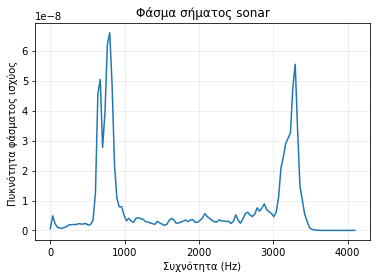

In [7]:
f, Pxx_den = signal.welch(s, Fs, noverlap=128, nperseg=256)
fig = plt.figure()
plt.title('Φάσμα σήματος sonar')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Πυκνότητα φάσματος ισχύος ')

plt.plot(f, Pxx_den)

### Σήμα βιολιού

In [8]:
from scipy import signal
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

In [9]:
f=open("LAB2_files/violin.wav", 'rb')
Fs_viol, s_viol = scipy.io.wavfile.read(f)
print('η συχνότητα δειγματολειψίας για το σήμα βιολιού είναι ',Fs_viol, ' Ηz', ' και ο αριθμός δειγμάτων είναι',len(s_viol))
f.close()

η συχνότητα δειγματολειψίας για το σήμα βιολιού είναι  44100  Ηz  και ο αριθμός δειγμάτων είναι 220500


#### Στο πεδίο του χρόνου
...

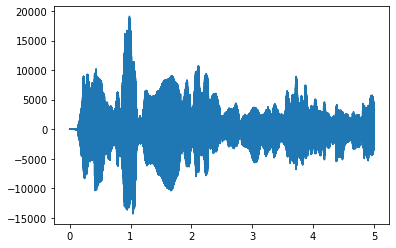

In [10]:
tvl=np.arange(0,len(s_viol))/Fs_viol # η χρονική διάρκεια του σήματος βιολιού βρίσκεται εάν διαιρέσουμε τον αριθμό 
                                     # δειγμάτων με τη συχνότητα δειγματολειψίας 
plt.plot(tvl,s_viol)
plt.show()

In [11]:
#sd.play(s_viol,Fs_viol)

#### Φάσμα (spectrum) και Φασματόγραμμα  (spectorgram) του σήματος βιολιού

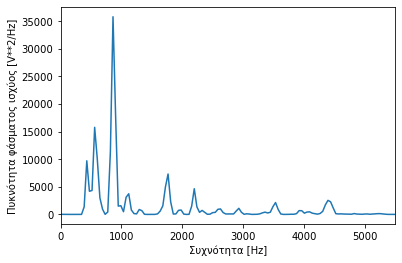

In [12]:
f, Pxx_den = signal.welch(s_viol, Fs_viol, nperseg=1024, noverlap=256) 
plt.plot(f, Pxx_den)
#plt.ylim([0.5e-2, 1e5])
plt.xlabel('Συχνότητα [Hz]')
plt.xlim(0, 5500)
plt.ylabel('Πυκνότητα φάσματος ισχύος [V**2/Hz]')
plt.show()

Το φασματόγραμμα είναι ένας τρόπος να εκτιμήσουμε τη μεταβολή του συχνοτικού περιοχομένου ενός σήματος συναρτήσει του χρόνου. Πιο συγκεκριμένα χρειαζόμαστε έναν τρόπο να διακρίνουμε το πότε υπεισέρχεται κάθε μια από τις διαφορετικές συχνότητες στο σήμα, μιας και ο DFT και το περιοδόγραμμα δεν δίνουν καμία πληροφορία για την εξάρτηση της συχνότητας από το χρόνο.
Για το λόγο αυτό χωρίζουμε το αρχικό σήμα σε επικαλυπτώμενα τμήματα μήκους L και υπολογίζουμε τον DFT τους. Τ οι συχνότητες τώρα που μπορούμε να αποδώσουμε σε κάθε ένα από αυτά τα χρονικά παράθυρα δίνονται από τη σχέση $ F_k = \frac{k}{L} \cdot F_s $. Στη σχέση αυτή βλέπουμε ότι το frequency resolution το οποίο μπορούμε να έχουμε (από τη μια συχνότητα στην επόμενη) δίνεται από τη σχέση $ \frac{F_s}{L} $. Ένα εύλογο ερώτημα είναι το γιατί δεν χρησιμοποιούμε μεγαλύτερο μήκος παραθύρου ώστε να μπορούμε να εκτιμήσουμε με μεγαλύτερο resolution το συχνοτικό περιεχόμενο σε χρονική στιγμή. Η απάντηση είναι ότι τότε μειώνουμε το resolution στο χρόνο, δηλαδή το πόσο σίγουροι είμαστε για το πότε εμφανίστηκε η κάθε συχνότητα στο σήμα μας. 
Για να καταλάβουμε το παραπάνω καλύτερα, η οριακή περίπτωση είναι όταν αφήσουμε το μήκος του χρονικού παραθύρου να πάει στο άπειρο, οπότε και παίρνουμε τον DFT του σήματος αλλά δεν έχουμε καμία πληροφορία για τον χρόνο. 
Αποδυκνύεται ότι το resolution στο χρόνο και το resolution στη συχνότητα, έχουν μια σχέση trade-off μεταξύ τους.

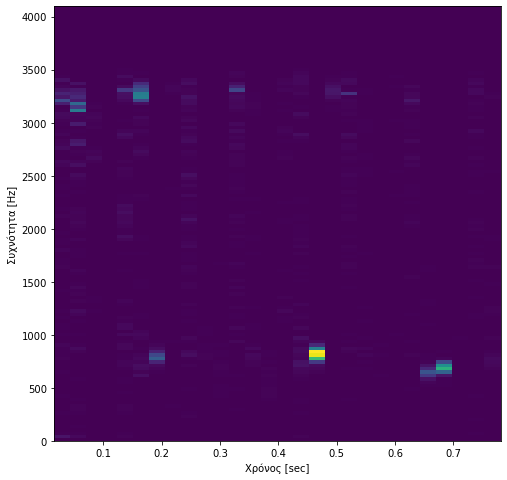

In [13]:
f, tsp, Sxx = signal.spectrogram(s, Fs)
plt.figure(figsize=(8, 8))
plt.pcolormesh(tsp, f, Sxx)
plt.ylabel('Συχνότητα [Hz]')
plt.xlabel('Χρόνος [sec]')
plt.show()

## ΑΣΚΗΣΗ 2

### ερώτημα 2

#### Η μέθοδος των παραθύρων
Σκοπός μας σε αυτό το μέρος της άσκησης είναι να σχεδιάζουμε φίλτρα στο πεδίο της συχνότητας. Πιο συγκεκριμένα επειδή ισχύει η σχέση $Υ(f) = X(f) \cdot H(f)$ όπου Υ είναι η έξοδος ενός φίλτρου με συνάρτηση μεταφοράς Η, ενώ Χ είναι η είσοδος, μπορούμε να βάλουμε άσσους στις συχνότητες τις οποίες θέλουμε να επιτρέψουμε στην έξοδο του φίλτρου και μηδενικά στις συχνότητες τις οποίες θέλουμε να αποκόψουμε

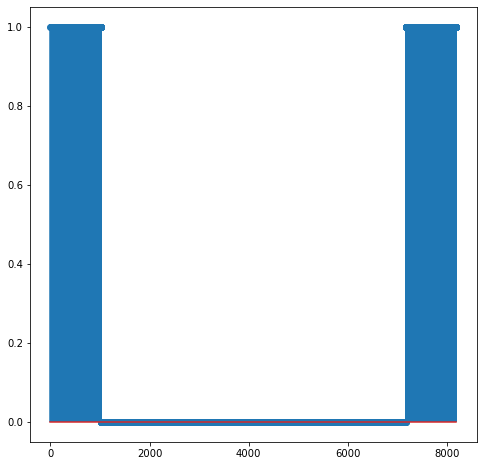

In [14]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Fs=8192  # η συχνότητα δειγματολειψίας

#H=np.hstack((np.ones(int(Fs/8)), np.zeros(int(Fs-Fs/4)), np.ones(int(Fs/8))))
H = np.hstack((np.ones(int(Fs/8)), np.zeros(int(Fs/2 - Fs/8))))
H = np.hstack((H, np.flip(H)))
plt.figure(figsize=(8, 8))
plt.stem(H)
plt.show()

Επειδή τα σήματα τα οποία εξετάζουμε είναι πραγματικά, ο μετασχηματισμός Fourier τους εμφανίζει άρτια συμμετρία ως προς την αρχή των αξόνων. Συνδυάζοντας το παραπάνω με το θεώρημα του Nyquist, το οποίο αποδυκνύει ότι μπορούμε να έχουμε συχνότητες μέχρι $\frac{F_s}{2}$ αντιλαμβανόμαστε ότι θα έχουμε μια άρτια συμμετρία ως προς το $\frac{F_s}{2}$ και επίσης ότι κάθε ένας από τους συμμετρικούς <<λοβούς>> θα έχει πλάτος $\frac{F_s}{2}$. 
Αυτός είναι και ο λόγος για τον οποίο δημιουργούμε το εκάστοτε φίλτρο μέχρι τη συχνότητα $\frac{F_s}{2}$ και στη συνέχεια <<προσθέτουμε>> τον ίδιο αλλά αναστραμένο.

#### _Ορθογωνικό παράθυρο (απλή περικοπή της h)_

[]

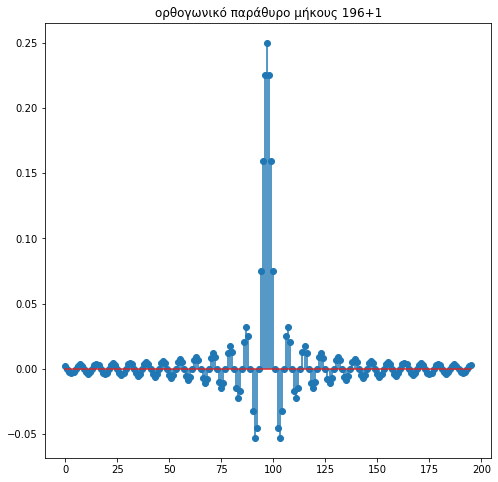

In [15]:
h = np.real(np.fft.ifft(H));
h = np.fft.fftshift(h)
middle = Fs//2
h196 = h[middle+1-98 : middle+99]   # FIR φίλτρο μήκους 196+1 δειγμάτων
h64 = h[middle+1-32 : middle + 33]  # FIR φίλτρο μήκους 64+1 δειγμάτων 
plt.figure(figsize=(8, 8))
plt.stem(h196)
plt.title('ορθογωνικό παράθυρο μήκους 196+1')
plt.plot()

#### παράθυρο hamming

[]

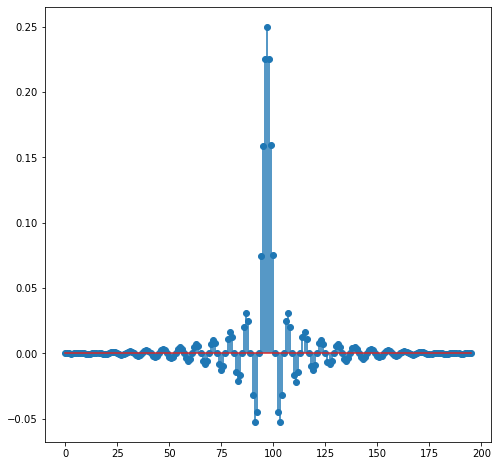

In [16]:
h196_hamming = signal.windows.hamming(M=196) * h196
plt.figure(figsize=(8, 8))
plt.stem(h196_hamming)
plt.plot()

Στη συνέχεια βλέπουμε την την απόκριση συχνότητας των 2 παραπάνω φίλτρων 
* ορθογώνιου παραθύρου
* παράθυρο hamming

Παρατηρούμε ότι το παράθυρο hamming ίδιου μήκους καταφέρνει να αποκόψει πολύ καλύτερα τις ανεπιθύμητες συχνότητες.

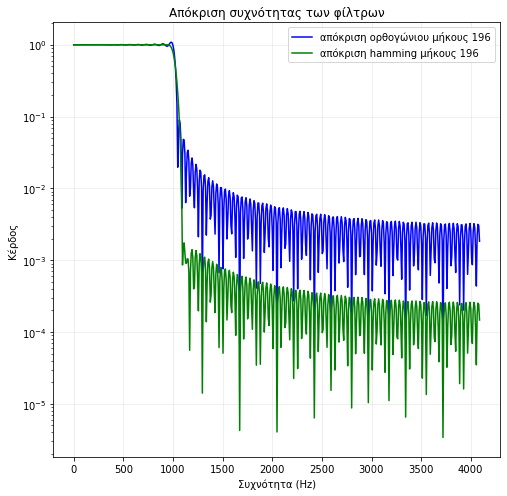

In [17]:
def plot_freq_responce(window, Fs=8192):
    freq, resp = signal.freqz(window)
    fig = plt.figure()
    plt.title('Απόκριση συχνότητας του φίλτρου')
    plt.grid(alpha=0.25)
    plt.xlabel('Συχνότητα (Hz)')
    plt.ylabel('Κέρδος')
    plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp))
    plt.show()


freq,resp196 = signal.freqz(h196);
_, resp196_hamming = signal.freqz(h196_hamming)


fig = plt.figure(figsize=(8, 8))
plt.title('Απόκριση συχνότητας των φίλτρων')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')

plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp196), 'b-')
plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp196_hamming), 'g-')
plt.legend(['απόκριση ορθογώνιου μήκους 196', 'απόκριση hamming μήκους 196'])
plt.show()

### ΕΡΏΤΗΜΑ 3: φίλτρα Parks-McClellan
Παρατηρούμε ότι το φίλτρο με μήκος 196 μειώνει σε πολύ μεγαλύτερο βαθμό τις ανεπιθύμητες συχνότητες. Επίσης δεν έχουμε πλευρικούς λοβούς

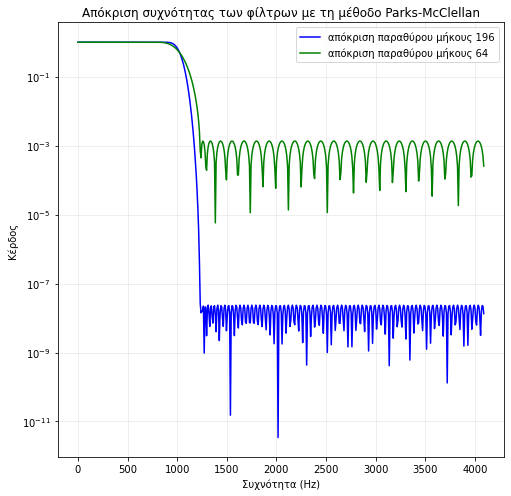

In [18]:
hpm1 = signal.remez(196, [0, 0.1, 0.15, 0.5], [1, 0])
hpm2 = signal.remez(64, [0, 0.1, 0.15, 0.5], [1, 0])

freq,resp196 = signal.freqz(hpm1);
_, resp64 = signal.freqz(hpm2)

fig = plt.figure(figsize=(8, 8))
plt.title('Απόκριση συχνότητας των φίλτρων με τη μέθοδο Parks-McClellan')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')

plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp196), 'b-')
plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp64), 'g-')
plt.legend(['απόκριση παραθύρου μήκους 196', 'απόκριση παραθύρου μήκους 64'])
plt.show()


### ερώτημα 4
Ουσιαστικά όταν αλλάζουμε τις οριακές συχνότητες του φίλτρου από (0.1, 0.15) σε (0.1, 0.11) ζητάμε από το φίλτρο να έχει μια πιο απότομη μεταβολή. Αυτό όπως φαίνεται στη συνέχεια έχει ως αποτέλεσμα όμως να έχουμε πολύ μιρκότερη αποκοπή στις υπόλοιπες συχνότητες και επομένως υπάρχει κάποιου είδους trade-off ανάμεσα στην ταχύτητα της μεταβολής και στην απόκριση του φίλτρου στις ανεπιθύμητες συχνότητες.

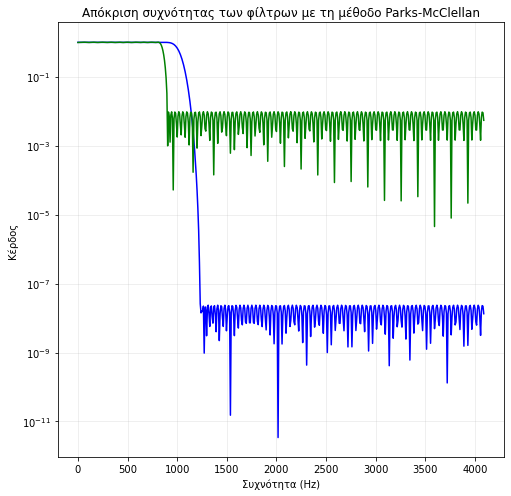

In [19]:
hpm3 = signal.remez(196, [0, 0.1, 0.11, 0.5], [1, 0])

freq2, resp196_new = signal.freqz(hpm3)

fig = plt.figure(figsize=(8, 8))
plt.title('Απόκριση συχνότητας των φίλτρων με τη μέθοδο Parks-McClellan')
plt.grid(alpha=0.25)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')

plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp196), 'b-')
plt.semilogy(0.5*Fs*freq2/np.pi, np.abs(resp196_new), 'g-')
plt.show()


### ΕΡΏΤΗΜΑ 5
Σχεδιάζουμε αρχικά το φάσμα ισχύος του σήματος

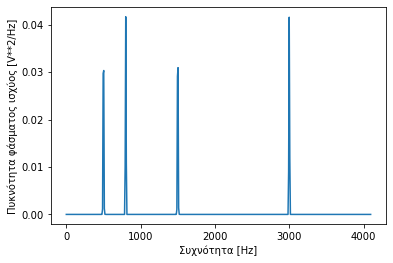

In [49]:
t = np.linspace(0, 1, Fs)
pi = np.pi
s = np.sin(2*pi*500*t) + np.sin(2*pi*800*t) + np.sin(2*pi*1500*t) + np.sin(2*pi*3000*t)
# πλοτάρουμε το περιοδόγραμμα του παραπάνω σήματος
f, Pxx_den = signal.welch(s, Fs, nperseg=1024, noverlap=256) 
plt.plot(f, Pxx_den)
#plt.ylim([0.5e-2, 1e5])
plt.xlabel('Συχνότητα [Hz]')
plt.ylabel('Πυκνότητα φάσματος ισχύος [V**2/Hz]')
plt.show()

Στη συνέχεια φιλτράρουμε το παραπάνω σήμα με τα 2 φίλτρα που σχεδιάσαμε στα ερωτήματα 3 και 4


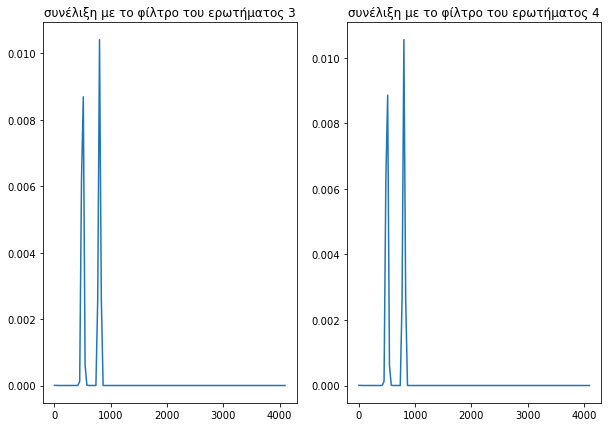

In [40]:
s1 = signal.convolve(s, hpm1, mode='same')
s2 = signal.convolve(s, hpm3, mode='same')
fig, ax = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)
ax[0].set(title='συνέλιξη με το φίλτρο του ερωτήματος 3')
ax[1].set(title='συνέλιξη με το φίλτρο του ερωτήματος 4')
f, Pxx_den1 = signal.welch(s1, Fs) 
f, Pxx_den2 = signal.welch(s2, Fs) 
ax[0].plot(f, Pxx_den1)
ax[1].plot(f, Pxx_den2)



### ΑΣΚΗΣΗ 3

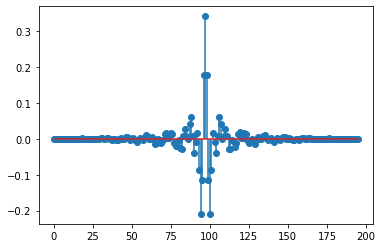

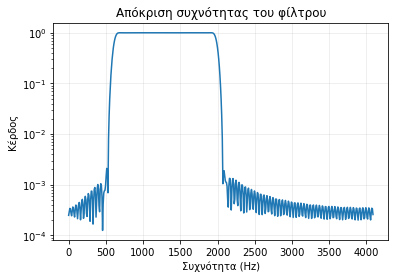

In [42]:
H = np.hstack((np.zeros(600), np.ones(2000-600), np.zeros(int(Fs/2) - 2000)))
H = np.hstack((H, np.flip(H)))
h = np.real(np.fft.ifft(H));
h = np.fft.fftshift(h)
middle = Fs//2
h196 = h[middle+1-98 : middle+99]
h196_hamming = signal.windows.hamming(M=196) * h196
plt.stem(h196_hamming)
plt.plot()
plot_freq_responce(h196_hamming) # η απόκριση συχνότητα του παραπάνω φίλτρου


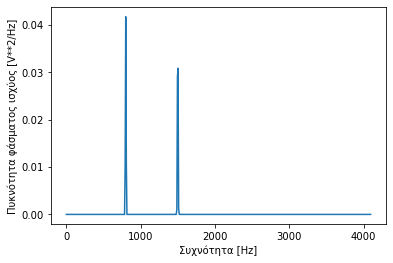

In [43]:
s1 = signal.convolve(s, h196_hamming, mode='same')
f, Pxx_den = signal.welch(s1, Fs, nperseg=1024, noverlap=256) 
plt.plot(f, Pxx_den)
#plt.ylim([0.5e-2, 1e5])
plt.xlabel('Συχνότητα [Hz]')
plt.ylabel('Πυκνότητα φάσματος ισχύος [V**2/Hz]')
plt.show()

Παραπάνω παρατηρούμε ότι πράγματι το φίλτρο λειτουργεί όπως θα έπρεπε μιας και αποκόπτει πλήρως τις συχνότητες στα 500 και στα 3000 Hz

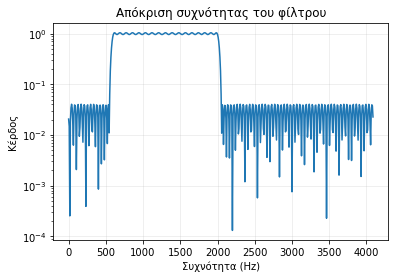

In [44]:
# σχεδίαση με τη μέθοδο Parks-McClellan
hpm1 = signal.remez(196, [0, 550, 600, 2000, 2050, Fs/2], [0, 1, 0], fs=Fs)
plot_freq_responce(hpm1)

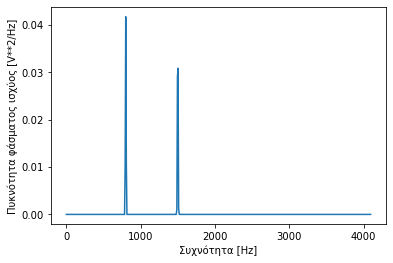

In [45]:
s2 = signal.convolve(s, hpm1, mode='same')
f, Pxx_den = signal.welch(s1, Fs, nperseg=1024, noverlap=256) 
plt.plot(f, Pxx_den)
#plt.ylim([0.5e-2, 1e5])
plt.xlabel('Συχνότητα [Hz]')
plt.ylabel('Πυκνότητα φάσματος ισχύος [V**2/Hz]')
plt.show()

### ΆΣΚΗΣΗ 4

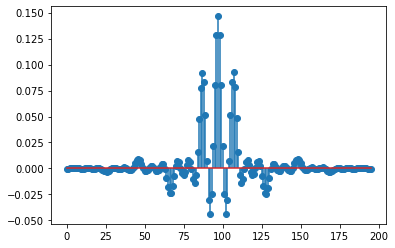

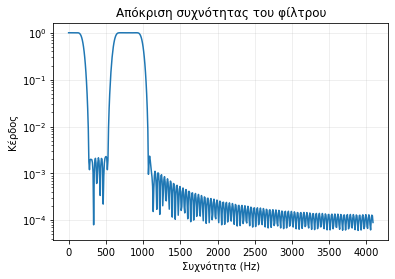

In [50]:
H = np.hstack((np.ones(200), np.zeros(600-200), np.ones(1000-600), np.zeros(int(Fs/2)-1000)))
H = np.hstack((H, np.flip(H)))
h = np.real(np.fft.ifft(H));
h = np.fft.fftshift(h)
middle = Fs//2
h196 = h[middle+1-98 : middle+99]
h196_hamming = signal.windows.hamming(M=196) * h196
plt.stem(h196_hamming)
plt.plot()
plot_freq_responce(h196_hamming) # η απόκριση συχνότητα του παραπάνω φίλτρου


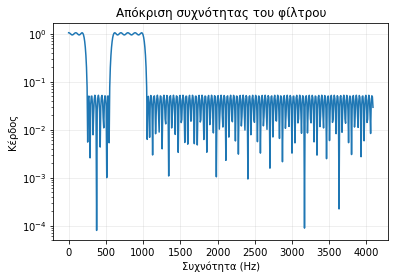

In [51]:
hpm2 = signal.remez(196, [0, 200, 250, 550, 600, 1000, 1050, int(Fs/2)], [1, 0, 1, 0], fs=Fs)
plot_freq_responce(hpm2)

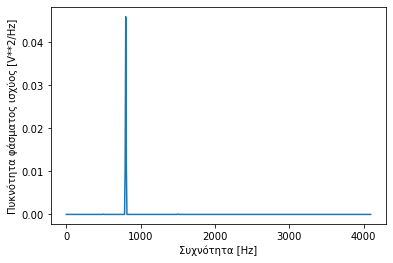

In [52]:
s2 = signal.convolve(s, hpm2, mode='same')
f, Pxx_den = signal.welch(s2, Fs, nperseg=1024, noverlap=256) 
plt.plot(f, Pxx_den)
#plt.ylim([0.5e-2, 1e5])
plt.xlabel('Συχνότητα [Hz]')
plt.ylabel('Πυκνότητα φάσματος ισχύος [V**2/Hz]')
plt.show()